In [420]:
import matplotlib.pylab as plt
%matplotlib inline

import yt
from yt import YTArray, YTQuantity
import trident
import numpy as np
import sys

import palettable
from matplotlib.colors import LogNorm, ListedColormap


sys.path.append('../analysis')
import spectrum_generating_tools as spg
import plotting_tools as pt


In [422]:
ds, gcenter, bv = spg.load_simulation_properties('P0_agncr')
ad = ds.sphere(gcenter, (250, 'kpc'))
print(ad.quantities.bulk_velocity().in_units('km/s'))
print(bv)

yt : [INFO     ] 2021-02-16 14:16:44,180 Parameters: current_time              = 3.398869692888919e+17 s
yt : [INFO     ] 2021-02-16 14:16:44,181 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-16 14:16:44,182 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-16 14:16:44,182 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-16 14:16:44,183 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-16 14:16:44,183 Parameters: current_redshift          = 0.24979488244391623
yt : [INFO     ] 2021-02-16 14:16:44,184 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-16 14:16:44,184 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-16 14:16:44,185 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-16 14:16:44,185 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-16 14:16:44,192 Allocating for 1.506e+06 p

[  80.59099507 -238.66698573  -67.04779675] km/s
[  74.98331176 -240.71723683  -67.77556155] km/s


yt : [INFO     ] 2021-02-16 14:23:09,259 Parameters: current_time              = 3.398869692888919e+17 s
yt : [INFO     ] 2021-02-16 14:23:09,260 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-16 14:23:09,261 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-16 14:23:09,262 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-16 14:23:09,262 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-16 14:23:09,263 Parameters: current_redshift          = 0.24979488244391623
yt : [INFO     ] 2021-02-16 14:23:09,263 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-16 14:23:09,263 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-16 14:23:09,264 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-16 14:23:09,264 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-16 14:23:09,273 Allocating for 1.506e+06 p


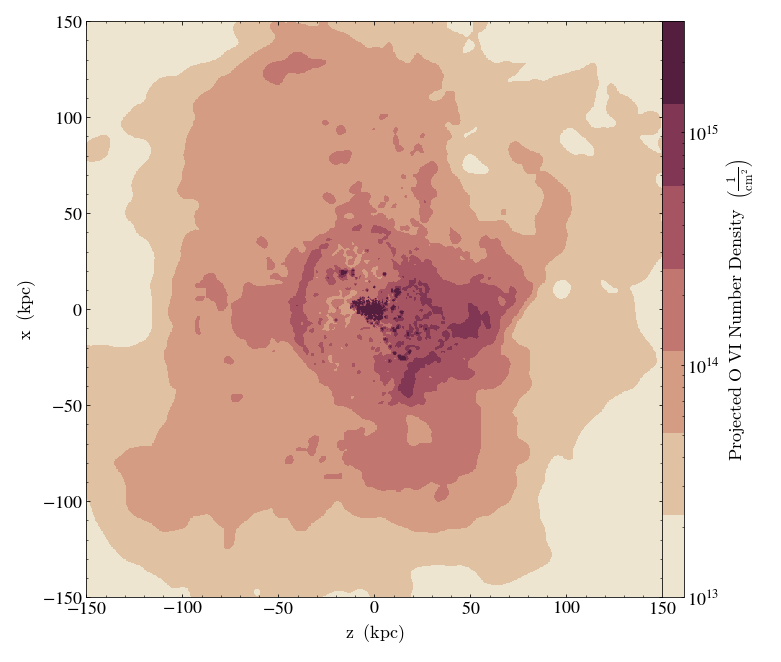

In [432]:
ds, gcenter, bv = spg.load_simulation_properties('P0_agncr')

#ad = ds.sphere(gcenter, (250, 'kpc'))
left_edge = gcenter - YTArray([250, 250, 250], 'kpc')
right_edge = gcenter + YTArray([250, 250, 250], 'kpc')

ad = ds.region(gcenter, left_edge, right_edge )
s = yt.ProjectionPlot(ds, 'y', ('gas', 'O_p5_number_density'), center = gcenter, 
                      width = (300, 'kpc'), weight_field = None, data_source = ad)
s.set_zlim(('gas', 'O_p5_number_density'), 1e13, 3e15)
cmap_ovi = ListedColormap(palettable.cartocolors.sequential.BrwnYl_7.mpl_colors)
s.set_cmap(('gas', 'O_p5_number_density'), cmap_ovi)
s.show()

yt : [INFO     ] 2021-02-11 13:27:11,013 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-02-11 13:27:11,014 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-11 13:27:11,014 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-11 13:27:11,015 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-11 13:27:11,016 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-11 13:27:11,016 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-02-11 13:27:11,017 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-11 13:27:11,017 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-11 13:27:11,018 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-11 13:27:11,018 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-11 13:27:11,043 Allocating for 3.151e+07 p


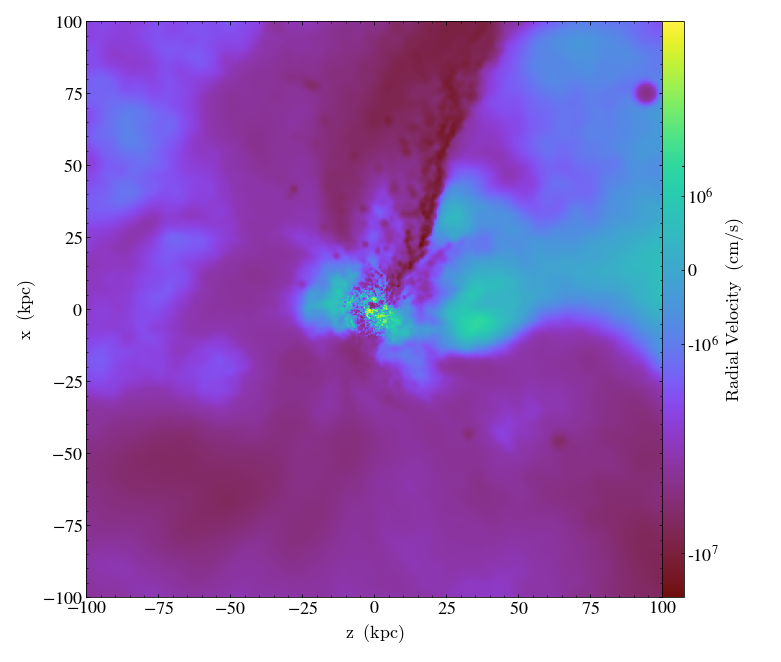

In [14]:
ds, gcenter, bv = spg.load_simulation_properties('P0')
ad = ds.all_data()
ad.set_field_parameter('bulk_velocity', bv)
ad.set_field_parameter('center', gcenter)
ad.field_parameters
s = yt.ProjectionPlot(ds, 'y', ('gas', 'radial_velocity'), width = (200, 'kpc'), 
                 center = gcenter, data_source = ad, weight_field = ('gas', 'density'))
s.show()


yt : [INFO     ] 2021-02-11 13:33:07,574 Parameters: current_time              = 3.398869692888919e+17 s
yt : [INFO     ] 2021-02-11 13:33:07,574 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-11 13:33:07,575 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-11 13:33:07,576 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-11 13:33:07,576 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-11 13:33:07,577 Parameters: current_redshift          = 0.24979488244391623
yt : [INFO     ] 2021-02-11 13:33:07,577 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-11 13:33:07,578 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-11 13:33:07,578 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-11 13:33:07,578 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-11 13:33:07,586 Allocating for 1.506e+06 p


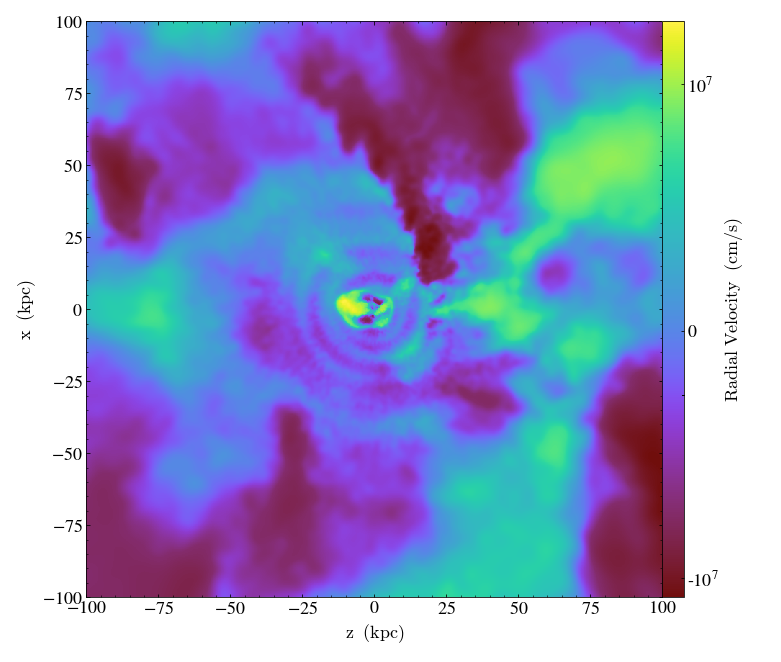

In [18]:
ds, gcenter, bv = spg.load_simulation_properties('P0_agncr')
ad = ds.all_data()
ad.set_field_parameter('bulk_velocity', bv)
ad.set_field_parameter('center', gcenter)
ad.field_parameters
s = yt.SlicePlot(ds, 'y', ('gas', 'radial_velocity'), width = (200, 'kpc'), 
                 center = gcenter, data_source = ad)
s.show()


yt : [INFO     ] 2021-02-11 13:28:35,280 xlim = 5207.338074 5407.338074
yt : [INFO     ] 2021-02-11 13:28:35,282 ylim = -17033.485446 -16833.485446
yt : [INFO     ] 2021-02-11 13:28:35,284 xlim = 0.130162 0.135161
yt : [INFO     ] 2021-02-11 13:28:35,285 ylim = -0.425767 -0.420768
yt : [INFO     ] 2021-02-11 13:28:35,299 Making a fixed resolution buffer of (('gas', 'radial_velocity')) 800 by 800
yt : [INFO     ] 2021-02-11 13:28:45,127 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [WARNING  ] 2021-02-11 13:28:54,472 Plot image for field ('gas', 'radial_velocity') has both positive and negative values. Min = -14755634.051333, Max = 12711927.684475.
yt : [WARNING  ] 2021-02-11 13:28:54,473 Switching to symlog colorbar scaling unless linear scaling is specified later



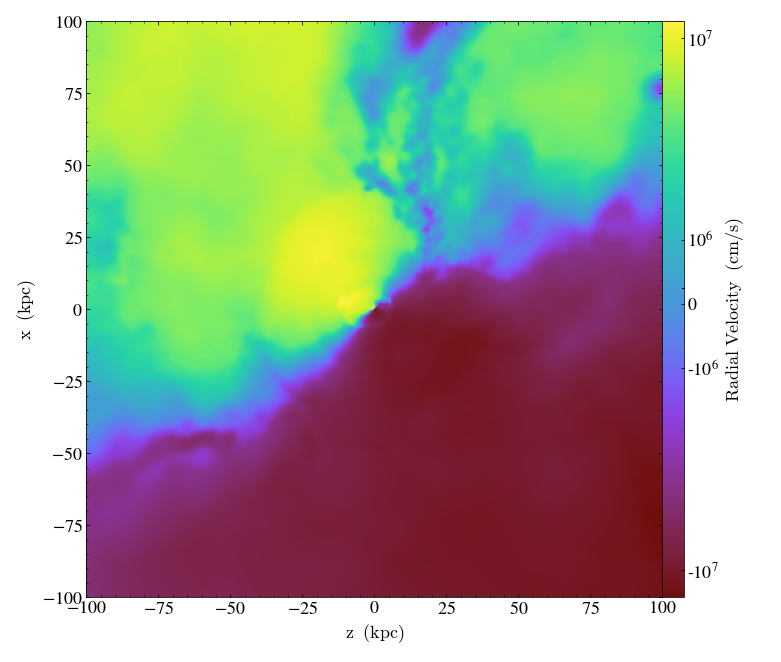

In [16]:
s = yt.ProjectionPlot(ds, 'y', ('gas', 'radial_velocity'), width = (200, 'kpc'), 
                 center = gcenter, weight_field = ('gas', 'density'))
s.show()


yt : [INFO     ] 2021-02-10 15:52:09,042 xlim = 5157.338074 5457.338074
yt : [INFO     ] 2021-02-10 15:52:09,044 ylim = -17083.485446 -16783.485446
yt : [INFO     ] 2021-02-10 15:52:09,046 xlim = 0.128912 0.136411
yt : [INFO     ] 2021-02-10 15:52:09,047 ylim = -0.427017 -0.419518
yt : [INFO     ] 2021-02-10 15:52:09,058 Making a fixed resolution buffer of (('gas', 'O_p5_number_density')) 800 by 800



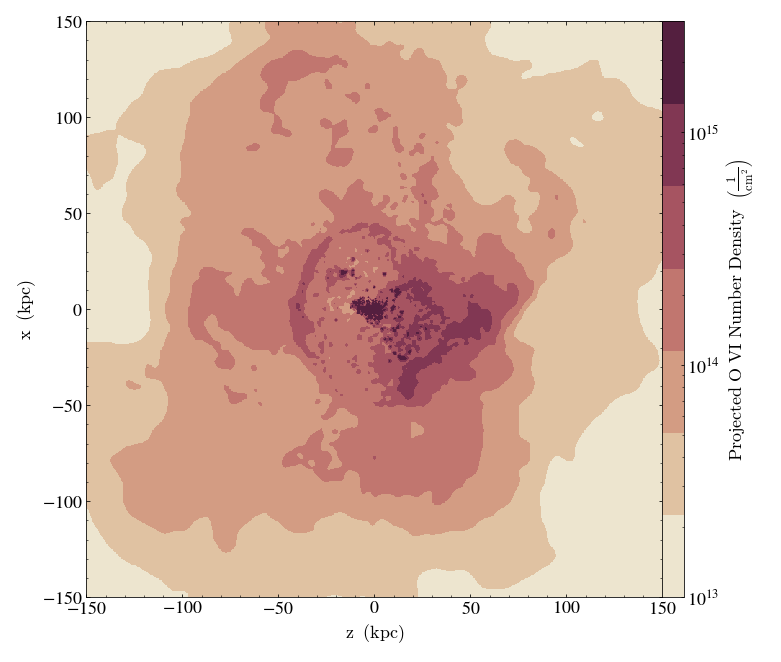

In [18]:
ad = ds.sphere(gcenter, (500, 'kpc'))
s = yt.ProjectionPlot(ds, 'y', ('gas', 'O_p5_number_density'), center = gcenter, 
                      width = (300, 'kpc'), weight_field = None, data_source = ad)
s.set_zlim(('gas', 'O_p5_number_density'), 1e13, 3e15)
cmap_ovi = ListedColormap(palettable.cartocolors.sequential.BrwnYl_7.mpl_colors)
s.set_cmap(('gas', 'O_p5_number_density'), cmap_ovi)
s.show()

yt : [INFO     ] 2021-02-04 15:23:21,251 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-02-04 15:23:21,252 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-04 15:23:21,253 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-04 15:23:21,254 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-04 15:23:21,255 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-04 15:23:21,255 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-02-04 15:23:21,256 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-04 15:23:21,256 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-04 15:23:21,257 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-04 15:23:21,257 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-04 15:23:21,262 Allocating for 1.447e+06 p


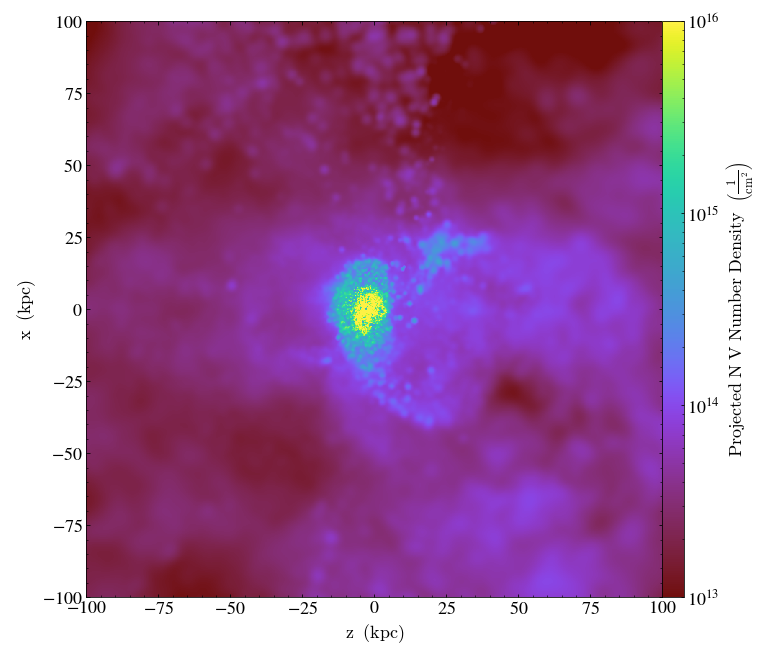

In [6]:
ds2, gcenter2, bv2 = spg.load_simulation_properties('P0')
ion_list = ['H I', 'O VI', 'Si II', 'Si III', 'Si IV', 'Mg II', 'N V']
trident.add_ion_fields(ds2, ions = ion_list)

s = yt.ProjectionPlot(ds2, 'y', ('gas', 'N_p4_number_density'), center = gcenter, 
                      width = (200, 'kpc'), weight_field = None)
s.set_zlim(('gas', 'N_p4_number_density'), 1e13, 1e16)
s.show()

In [22]:
ds, gcenter, bulk_velocity = ds, gcenter, bv = spg.load_simulation_properties('P0')
code_unit_conversion = ds.domain_right_edge.d / ds.domain_right_edge.in_units('kpc').d

gcenter_kpc = [cx[0], cy[0], cz[0]]  # assuming galaxy center is the same for all sightlines
print(gcenter, gcenter_kpc)
gcenter = gcenter_kpc * code_unit_conversion
bulk_velocity = YTArray([bvx[0], bvy[0], bvz[0]], 'km/s')

yt : [INFO     ] 2021-02-11 16:22:10,866 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-02-11 16:22:10,867 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-11 16:22:10,867 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-11 16:22:10,868 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-11 16:22:10,869 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-11 16:22:10,869 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-02-11 16:22:10,870 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-11 16:22:10,870 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-11 16:22:10,870 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-11 16:22:10,871 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-11 16:22:10,891 Allocating for 3.151e+07 p

[-16933.77317667 -12009.28144633   5305.25448309] kpc [-16933.77, -12009.28, 5305.254]


In [23]:
ray_data_file = '../../data/unanalyzed_spectra/P0_z0.25_ray_data.dat'
print(ray_data_file)
ray_id_list, impact, bvx, bvy, bvz, xi, yi, zi, xf, yf, zf, cx, cy, cz =\
    np.loadtxt(ray_data_file, skiprows = 1, unpack = True)

ray_start_list = np.ndarray(shape=(0, 3))
ray_end_list = np.ndarray(shape=(0, 3))
for i in range(len(xi)):
    ray_start_list = np.vstack((ray_start_list, [xi[i], yi[i], zi[i]] * code_unit_conversion))
    ray_end_list   = np.vstack((ray_end_list,   [xf[i], yf[i], zf[i]] * code_unit_conversion))

../../data/unanalyzed_spectra/P0_z0.25_ray_data.dat


yt : [INFO     ] 2021-02-12 16:40:21,163 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-02-12 16:40:21,163 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-12 16:40:21,164 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-12 16:40:21,165 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-12 16:40:21,166 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-12 16:40:21,166 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-02-12 16:40:21,167 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-12 16:40:21,167 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-12 16:40:21,168 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-12 16:40:21,168 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-12 16:40:21,194 Allocating for 3.151e+07 p

[-16933.77317667 -12009.28144633   5305.25448309] kpc [-16933.77, -12009.28, 5305.254]
[-0.42325116 -0.30019586  0.13300007] unitary [-0.01105844  0.0057593   0.00086261] [300.  20.  10.] kpc
1.689946e+10 2.184250e+17


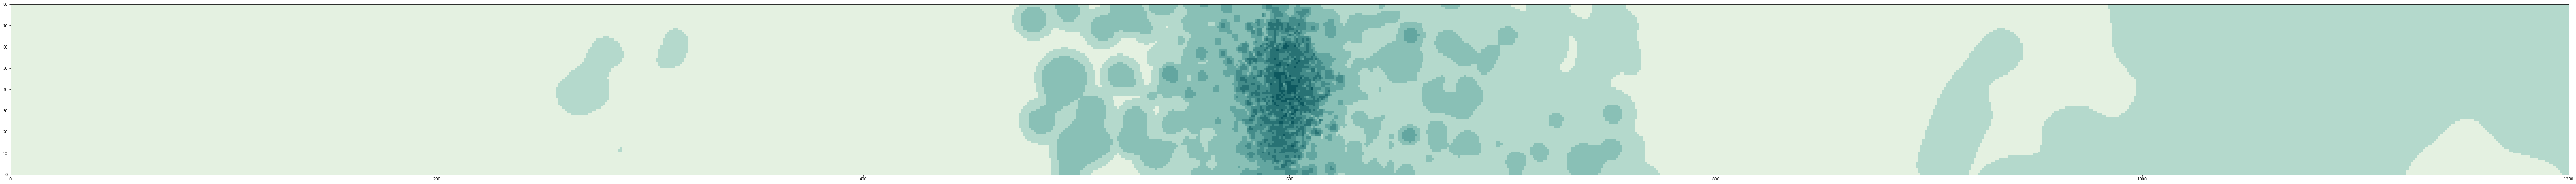

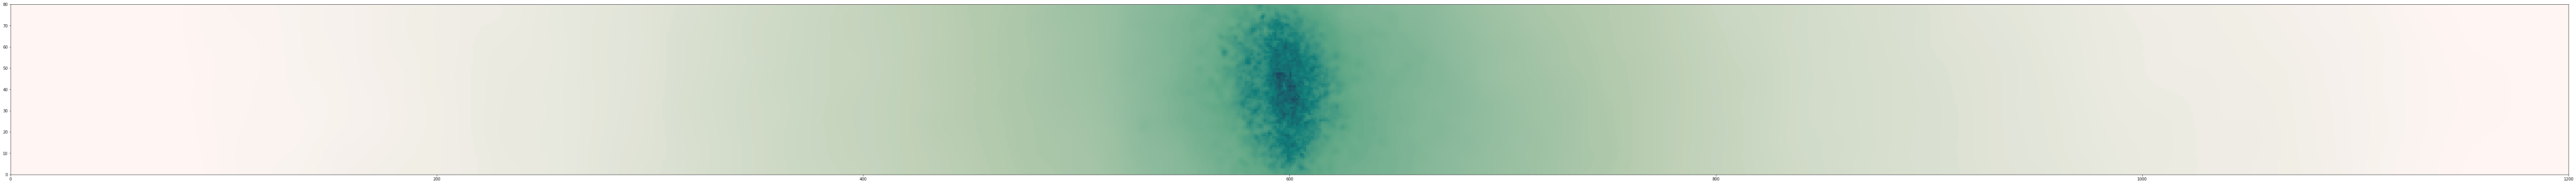

In [280]:
ds, gcenter, bulk_velocity = ds, gcenter, bv = spg.load_simulation_properties('P0')
code_unit_conversion = ds.domain_right_edge.d / ds.domain_right_edge.in_units('kpc').d

gcenter_kpc = [cx[0], cy[0], cz[0]]  # assuming galaxy center is the same for all sightlines
print(gcenter, gcenter_kpc)
gcenter = gcenter_kpc * code_unit_conversion
bulk_velocity = YTArray([bvx[0], bvy[0], bvz[0]], 'km/s')

i = 5

#weight = ('gas', 'ones')

ad = ds.all_data()
ad.set_field_parameter('bulk_velocity', bulk_velocity)
ad.set_field_parameter('center', gcenter)


#width = np.array([300., 20., 1000]) # kpc
#width *= code_unit_conversion
width = ds.arr([300., 20., 10], 'kpc')


ray_direction = ray_end_list[i] - ray_start_list[i]
ray_center = ray_start_list[i] + 0.5*(ray_direction)#ray_end_list[i] - ray_start_list[i])
#normal_vector = ray_center - gcenter

gcenter_kpc = [cx[0], cy[0], cz[0]]  # assuming galaxy center is the same for all sightlines
print(gcenter, gcenter_kpc)
normal_vector = gcenter - ray_center  # thisi the right one to use if you want to look away from galaxy
normal_vector /= np.linalg.norm(normal_vector)

ray_center = ds.arr(ray_center, 'unitary')

print(ray_center, ray_direction, width)
# first define left edge relative to 
#left_edge = ray_center 
#left_edge = np.dot(ds.arr([10, 0, 10]), norm_ray_direction)
#print(left_edge, ray_start_list[i])
#left_edge = ray_start_list[i] - left_edge
#box = ds.region(ray_center, left_edge, right_edge, fields = ('gas', 'density'))


radius = YTQuantity(10, 'kpc')
height = YTQuantity(500, 'kpc')
disk = ds.disk(ray_center, ray_direction, radius, height, fields = ('gas', 'density'))

field = 'Si_p3_number_density'#number_density'
weight = ('gas', 'ones')
weight = None
image = yt.off_axis_projection(ad, center = ray_center, normal_vector = normal_vector,
                width = width, resolution = [1200, 80], item = ('gas', field), weight = weight)
print("%e %e"%(np.min(image), np.max(image)))
fig, ax = plt.subplots(figsize = (120, 8))
ax.pcolormesh(image.T, norm = LogNorm(), cmap = pt.get_cmap(field))#,
                             # vmin = 1e10, vmax = 1e15)
ax.set_aspect('1')

field = 'density'
weight= ('gas', 'ones')
image = yt.off_axis_projection(ad, center = ray_center, normal_vector = normal_vector,
                width = width, resolution = [1200, 80], item = ('gas', field), weight = weight)
fig, ax = plt.subplots(figsize = (120, 8))
ax.pcolormesh(image.T, norm = LogNorm(), cmap = pt.get_cmap(field),
                              vmin = 1e-29, vmax = 1e-25)
ax.set_aspect('1')

In [113]:
disk = ds.disk(ray_center, ray_direction, radius, height, ds = ds)#, fields = ('gas', 'density'))
#disk[('gas', 'Si_p3_number_density')]

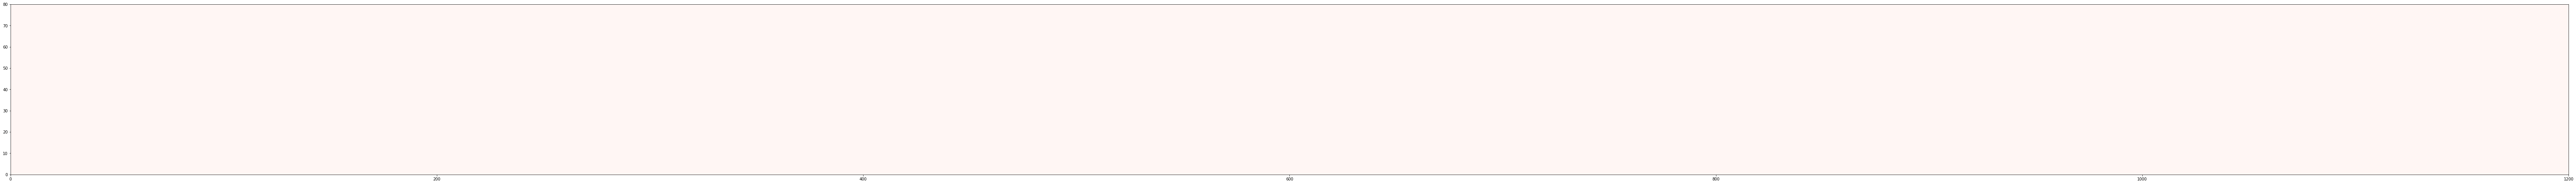

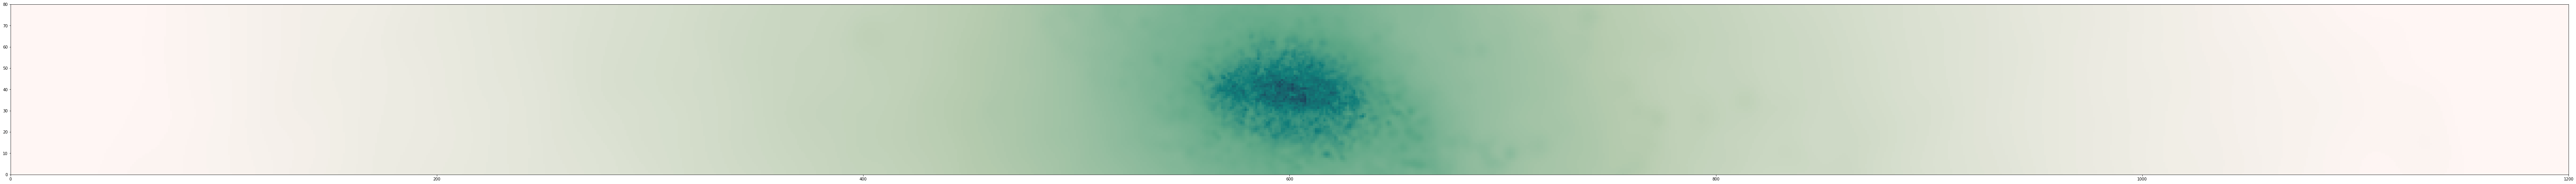

In [91]:
image = yt.off_axis_projection(ds, center = ray_center, normal_vector = normal_vector,
                width = width, resolution = [1200, 80], item = ('gas', field), weight = weight)
fig, ax = plt.subplots(figsize = (120, 8))
ax.pcolormesh(image.T, norm = LogNorm(), cmap = pt.get_cmap(field),
                              vmin = 1e10, vmax = 1e15)
ax.set_aspect('1')

field = 'density'
weight= ('gas', 'ones')
image = yt.off_axis_projection(ds, center = ray_center, normal_vector = normal_vector,
                width = width, resolution = [1200, 80], item = ('gas', field), weight = weight)
fig, ax = plt.subplots(figsize = (120, 8))
ax.pcolormesh(image.T, norm = LogNorm(), cmap = pt.get_cmap(field),
                              vmin = 1e-29, vmax = 1e-25)
ax.set_aspect('1')

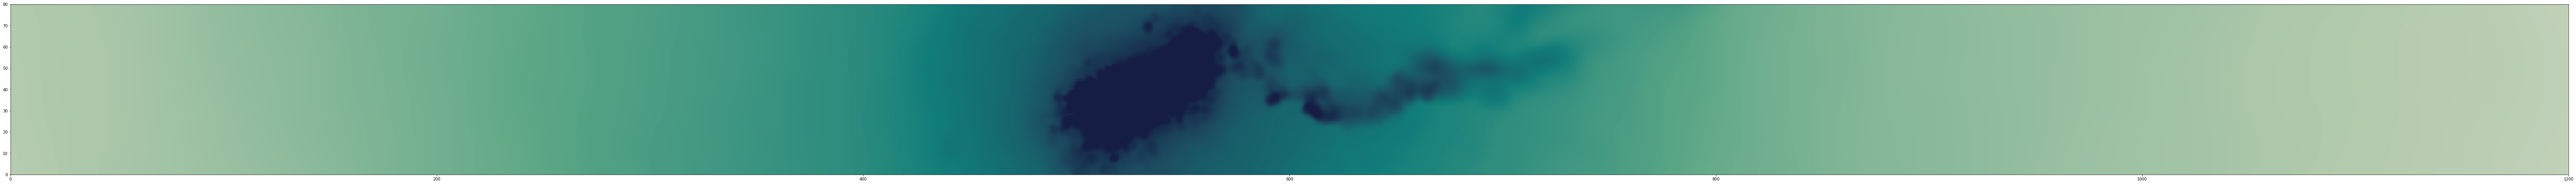

In [43]:
fig, ax = plt.subplots(figsize = (120, 8))
ax.pcolormesh(image.T, norm = LogNorm(), cmap = pt.get_cmap(field),
                              vmin = 1e-29, vmax = 1e-25)
ax.set_aspect('1')

yt : [INFO     ] 2021-02-11 16:52:14,683 xlim = -0.427001 -0.419502
yt : [INFO     ] 2021-02-11 16:52:14,685 ylim = -0.300446 -0.299946
yt : [INFO     ] 2021-02-11 16:52:14,687 xlim = -0.427001 -0.419502
yt : [INFO     ] 2021-02-11 16:52:14,688 ylim = -0.300446 -0.299946
yt : [INFO     ] 2021-02-11 16:52:14,701 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2021-02-11 16:52:24,157 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



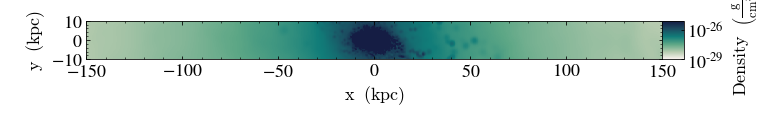

In [47]:
field = ('gas', 'density')
p = yt.ProjectionPlot(ds, 'z', field, center = ray_center, 
                     width = width, weight_field = ('gas', 'density'))
p.set_cmap(field, pt.get_cmap(field[1]))
p.set_zlim(field, 1e-29, 1e-25)
p.show()

yt : [INFO     ] 2021-02-12 15:01:04,877 xlim = -0.303945 -0.296446
yt : [INFO     ] 2021-02-12 15:01:04,879 ylim = 0.129251 0.136749
yt : [INFO     ] 2021-02-12 15:01:04,881 xlim = -0.303945 -0.296446
yt : [INFO     ] 2021-02-12 15:01:04,882 ylim = 0.129251 0.136749
yt : [INFO     ] 2021-02-12 15:01:04,895 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2021-02-12 15:01:06,159 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



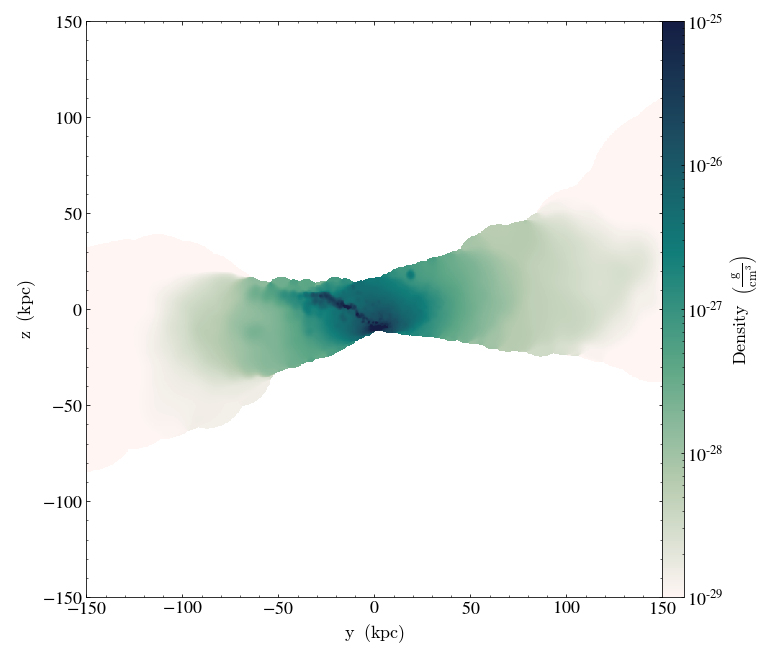

In [140]:
radius = YTQuantity(10, 'kpc')
height = YTQuantity(500, 'kpc')
disk = ds.disk(ray_center, ray_direction, radius, height, fields = ('gas', 'density'))

field = ('gas', 'density')
p = yt.ProjectionPlot(ds, 'x', field, center = ray_center, 
                     width =(300, 'kpc'), weight_field = ('gas', 'density'), data_source = disk)
p.set_cmap(field, pt.get_cmap(field[1]))
p.set_zlim(field, 1e-29, 1e-25)
p.show()

yt : [INFO     ] 2021-02-12 15:01:23,865 xlim = 0.129251 0.136749
yt : [INFO     ] 2021-02-12 15:01:23,866 ylim = -0.427001 -0.419502
yt : [INFO     ] 2021-02-12 15:01:23,868 xlim = 0.129251 0.136749
yt : [INFO     ] 2021-02-12 15:01:23,869 ylim = -0.427001 -0.419502
yt : [INFO     ] 2021-02-12 15:01:23,880 Making a fixed resolution buffer of (('gas', 'Si_p2_number_density')) 800 by 800



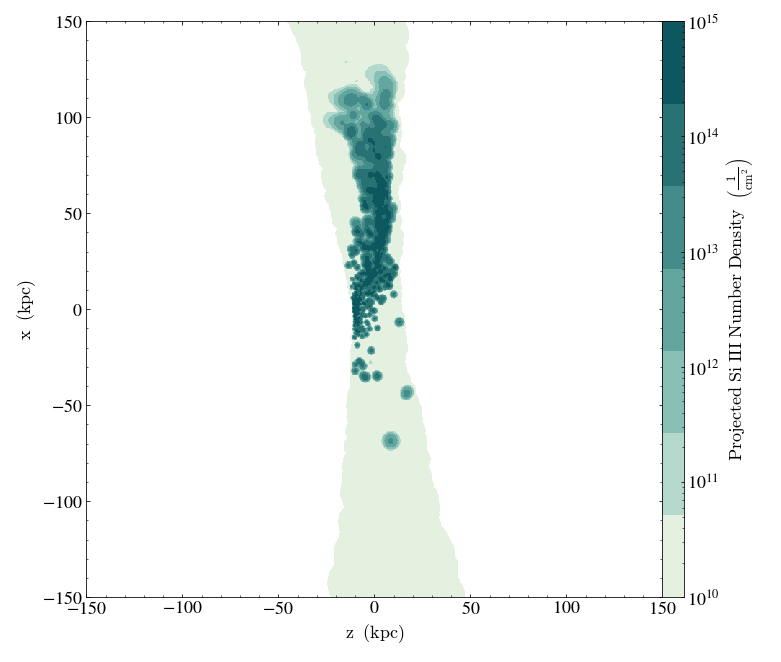

In [141]:
field = ('gas', 'Si_p2_number_density')
p = yt.ProjectionPlot(ds, 'y', field, center = ray_center, 
                     width =(300, 'kpc'), weight_field = None, data_source = disk)
p.set_cmap(field, pt.get_cmap(field[1]))
p.set_zlim(field, 1e10, 1e15)
p.show()

yt : [INFO     ] 2021-02-12 15:39:07,201 xlim = -0.306445 -0.293947
yt : [INFO     ] 2021-02-12 15:39:07,202 ylim = 0.126751 0.139249
yt : [INFO     ] 2021-02-12 15:39:07,203 xlim = -0.306445 -0.293947
yt : [INFO     ] 2021-02-12 15:39:07,204 ylim = 0.126751 0.139249
yt : [INFO     ] 2021-02-12 15:39:07,214 Making a fixed resolution buffer of (('gas', 'Si_p2_mass')) 800 by 800
yt : [INFO     ] 2021-02-12 15:39:09,446 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



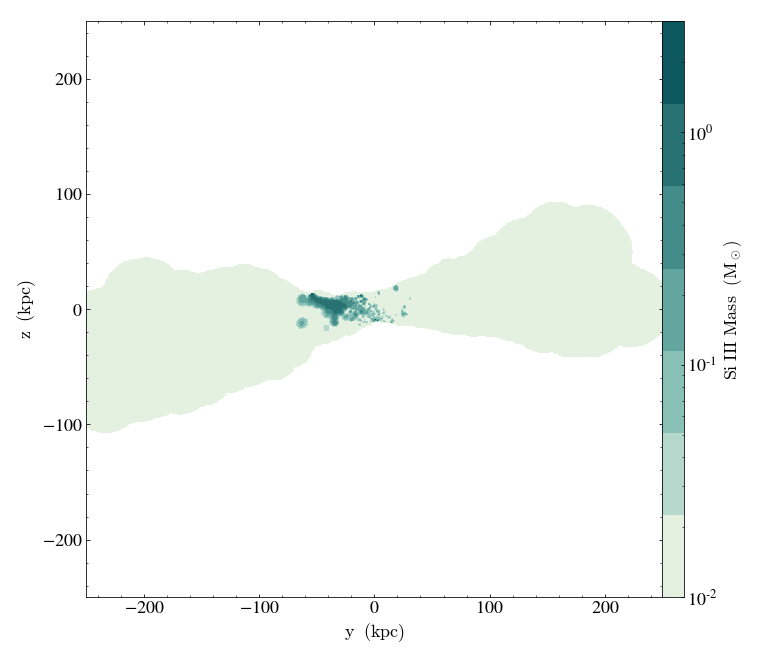

In [230]:
field = ('gas', 'Si_p2_mass')
p = yt.ProjectionPlot(ds, 'x', field, center = ray_center, 
                     width =(500, 'kpc'), weight_field = ('gas', 'density'), data_source = disk)
p.set_cmap(field, pt.get_cmap(field[1]))
p.set_unit(field, 'Msun')
p.set_zlim(field, 1e-2, 3)
p.show()

frb = p.data_source.to_frb((300, 'kpc'), 800)
data = YTArray(frb[field], 'g').in_units('Msun')



yt : [INFO     ] 2021-02-12 16:30:14,675 xlim = -0.427001 -0.419502
yt : [INFO     ] 2021-02-12 16:30:14,676 ylim = -0.303945 -0.296446
yt : [INFO     ] 2021-02-12 16:30:14,677 xlim = -0.427001 -0.419502
yt : [INFO     ] 2021-02-12 16:30:14,677 ylim = -0.303945 -0.296446
yt : [INFO     ] 2021-02-12 16:30:14,678 Making a fixed resolution buffer of (('gas', 'O_p5_mass')) 800 by 800



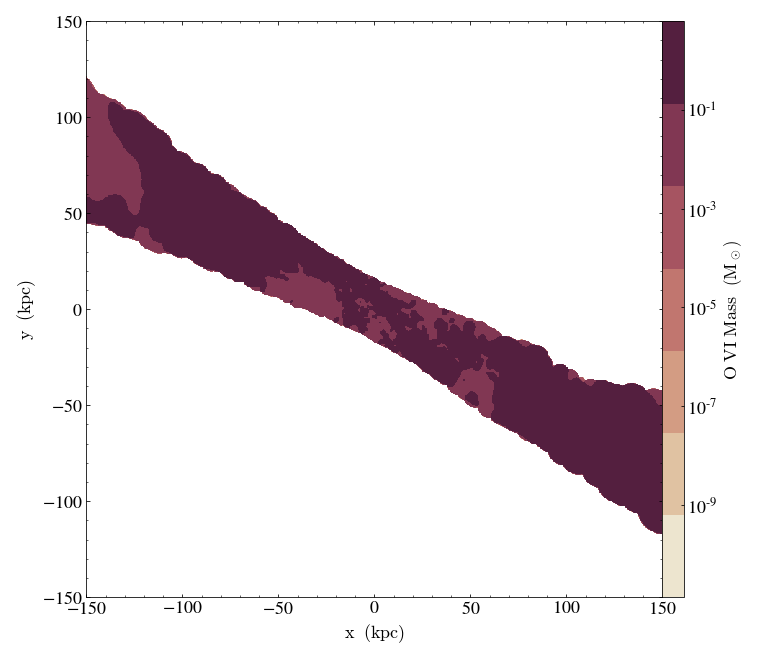

In [266]:
#print(ds.derived_field_list)
disk = ds.disk(ray_center, ray_direction, radius, height, data_source = ad, ds = ds)

field = ('gas', '0_p5_number_density')
field = ('gas', 'O_p5_mass')
p = yt.SlicePlot(ds, 'z', field, center = ray_center, 
                     width =(300, 'kpc'), data_source = disk)# weight_field = ('gas', 'ones'), data_source = disk)
p.set_cmap(field, pt.get_cmap(field[1]))
p.set_unit(field, 'Msun')
#p.set_zlim(field, 1e10, 1e15)
p.show()

yt : [INFO     ] 2021-02-12 16:04:26,543 xlim = -0.300683 -0.299683
yt : [INFO     ] 2021-02-12 16:04:26,544 ylim = 0.132110 0.133110
yt : [INFO     ] 2021-02-12 16:04:26,545 xlim = -0.300683 -0.299683
yt : [INFO     ] 2021-02-12 16:04:26,546 ylim = 0.132110 0.133110
yt : [INFO     ] 2021-02-12 16:04:26,547 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



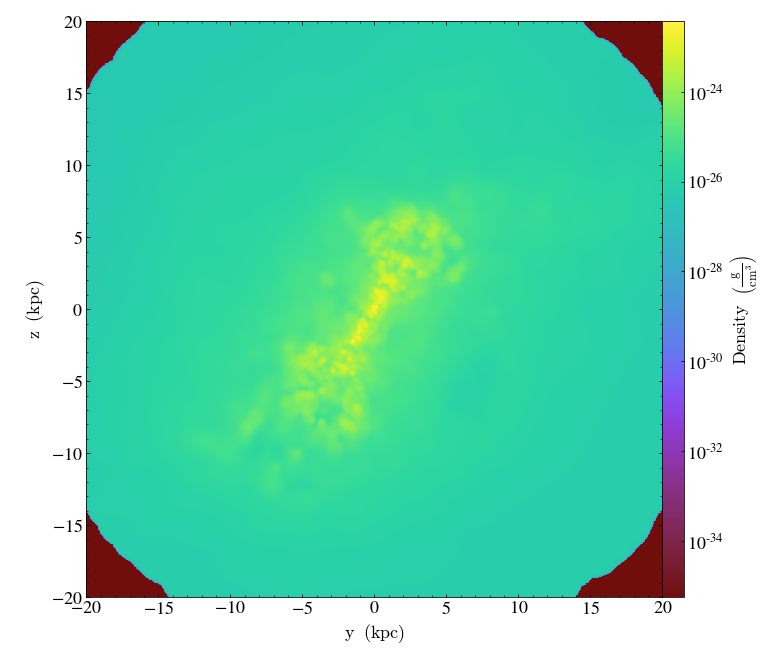

In [235]:
sp = ds.sphere(gcenter, (20, 'kpc'))
s = yt.SlicePlot(ds, 'x', ('gas', 'density'), center = gcenter, width = (40, 'kpc'), data_source = sp)
s.show()

sp = ds.sphere(gcenter, (20, 'kpc'))

    

In [287]:
ds, gcenter, bulk_velocity = ds, gcenter, bv = spg.load_simulation_properties('P0')


yt : [INFO     ] 2021-02-12 16:43:10,400 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-02-12 16:43:10,400 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-02-12 16:43:10,402 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-02-12 16:43:10,403 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-02-12 16:43:10,403 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-02-12 16:43:10,404 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-02-12 16:43:10,404 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-02-12 16:43:10,404 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-02-12 16:43:10,405 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-02-12 16:43:10,405 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-02-12 16:43:10,427 Allocating for 3.151e+07 p

In [288]:
s = ds.cutting(normal_vector, ray_center, ds = ds)

In [369]:
gcenter_kpc = [cx[0], cy[0], cz[0]]  # assuming galaxy center is the same for all sightlines
print(gcenter, ray_center, ray_direction)
normal_vector = ray_center - gcenter
#normal_vector /= np.linalg.norm(normal_vector)
normed_ray_direction = ray_direction / np.linalg.norm(ray_direction)


print(np.dot(normal_vector, ray_direction))

s = ds.cutting(normal_vector, ray_center, ds = ds, north_vector = ray_direction)
si = s[('gas', 'Si_p3_mass')].in_units('Msun')
ovi = s[('gas', 'O_p5_mass')].in_units('Msun')
#s[('gas', 'relative_x')].in_units('kpc')
#len(s[('gas','relative_z')].in_units('kpc'))
x = s[('gas', 'relative_x')].in_units('kpc')
y = s[('gas', 'relative_y')].in_units('kpc')
z = s[('gas', 'relative_z')].in_units('kpc')


[-16933.77317667 -12009.28144633   5305.25448309] kpc [-0.42325116 -0.30019586  0.13300007] unitary [-0.01105844  0.0057593   0.00086261]
-6.349747556133335e-10


In [406]:
s.set_field_parameter('bulk_velocity', bv)
V = s[('Gas', 'Velocities')].in_units('km/s')
#print(V)
vx = V[:, 0] - bv[0]
vy = V[:, 1] - bv[1]
vz = V[:, 2] - bv[2]

In [404]:
vz

unyt_array([-46.60950923, -53.43221902, -48.8101371 , ...,  28.62520762,
             40.10436375,  46.39447123], 'km/s')

<ipython-input-419-5ae923c9ca9c>:13: RuntimeWarning: invalid value encountered in true_divide
  H = H.T / divide_factor


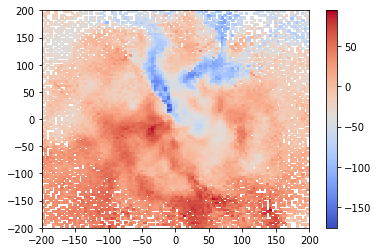

In [419]:
#plt.scatter(x, y)
xlims = (-200, 200)
ylims = (-200, 200)

nbins = 50
xedges = np.linspace(xlims[0], xlims[1], nbins)
yedges = np.linspace(ylims[0], ylims[1], nbins)
weights = vx#s[('gas', 'relative_velocity_x')]
normed = False
#weights = None

H, xedges, yedges = np.histogram2d(x, y, range = [xlims, ylims], bins = 100, weights = weights, normed = normed)
H = H.T / divide_factor
X, Y = np.meshgrid(xedges, yedges)

#fig, ax = plt.subplots()
plt.pcolormesh(Y, X, H, norm=  None, cmap = 'coolwarm')
plt.colorbar()
#ax.set_aspect(1)

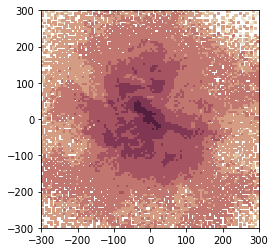

In [349]:
xlims = (-300, 300)
ylims = (-300, 300)

nbins = 50
xedges = np.linspace(xlims[0], xlims[1], nbins)
yedges = np.linspace(ylims[0], ylims[1], nbins)
weights = s[('gas', 'O_p5_number_density')]
normed = False
#weights = None

H, xedges, yedges = np.histogram2d(x, y, range = [xlims, ylims], bins = 100, weights = weights, normed = normed)
H = H.T
X, Y = np.meshgrid(xedges, yedges)

fig, ax = plt.subplots()
ax.pcolormesh(X, Y, H, norm = LogNorm(), cmap = pt.get_cmap('O_p5_mass'))#, vmin = 1, vmax = 50)
#plt.colorbar()
ax.set_aspect('equal')
#ax.set_ylim(-50, 50)

In [196]:
frb = p.data_source.to_frb((300, 'kpc'), 800)
data = YTArray(frb[field], 'g').in_units('Msun')

yt : [INFO     ] 2021-02-12 15:26:11,502 Making a fixed resolution buffer of (('gas', 'O_p5_mass')) 800 by 800
yt : [INFO     ] 2021-02-12 15:26:13,829 Making a fixed resolution buffer of (('gas', 'ones')) 800 by 800


In [239]:
list(ds.derived_field_list)

[('DarkMatter', ''),
 ('DarkMatter', 'Coordinates'),
 ('DarkMatter', 'ESNRate'),
 ('DarkMatter', 'Epsilon'),
 ('DarkMatter', 'FeMassFrac'),
 ('DarkMatter', 'FeMassFracdot'),
 ('DarkMatter', 'Fe_fraction'),
 ('DarkMatter', 'HI'),
 ('DarkMatter', 'H_fraction'),
 ('DarkMatter', 'HeI'),
 ('DarkMatter', 'HeII'),
 ('DarkMatter', 'He_fraction'),
 ('DarkMatter', 'He_p2_fraction'),
 ('DarkMatter', 'Mass'),
 ('DarkMatter', 'Metalsdot'),
 ('DarkMatter', 'O_fraction'),
 ('DarkMatter', 'OxMassFrac'),
 ('DarkMatter', 'OxMassFracdot'),
 ('DarkMatter', 'Phi'),
 ('DarkMatter', 'Velocities'),
 ('DarkMatter', 'coolontime'),
 ('DarkMatter', 'den'),
 ('DarkMatter', 'igasorder'),
 ('DarkMatter', 'iord'),
 ('DarkMatter', 'massform'),
 ('DarkMatter', 'particle_angular_momentum'),
 ('DarkMatter', 'particle_angular_momentum_magnitude'),
 ('DarkMatter', 'particle_angular_momentum_x'),
 ('DarkMatter', 'particle_angular_momentum_y'),
 ('DarkMatter', 'particle_angular_momentum_z'),
 ('DarkMatter', 'particle_cylindr

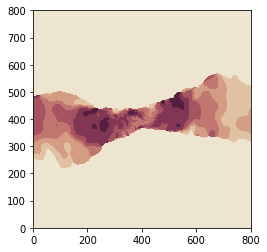

In [227]:
frb = p.data_source.to_frb((300, 'kpc'), 800)
data = YTArray(frb[field], 'g').in_units('Msun')
fig, ax = plt.subplots()
ax.pcolormesh(scipy.ndimage.rotate(data, 0), norm = LogNorm(), cmap = pt.get_cmap('O_p5_number_density'), vmin = 1e-2, vmax = 3)
#ax.set_ylim(350, 450)
ax.set_aspect('equal')


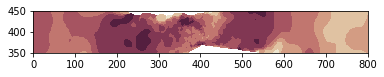

In [217]:
fig, ax = plt.subplots()
ax.pcolormesh(data, norm = LogNorm(), cmap = pt.get_cmap('O_p5_number_density'), vmin = 1e-2, vmax = 3)
ax.set_ylim(350, 450)
ax.set_aspect('equal')


In [178]:
import scipy
scipy.ndimage.rotate(data, 90)

array([[ 2.41716494e-154, -8.38629556e-154,  2.37629058e-153, ...,
         5.42873372e-046,  1.70634415e-048,  4.57484523e-046],
       [-9.50768064e-156, -7.82692000e-154,  2.56274910e-153, ...,
         2.41311196e-046, -7.74281649e-048, -8.99158431e-047],
       [-1.30705717e-154,  1.16135736e-154,  2.37629058e-153, ...,
         2.43697941e-046,  1.93301014e-047, -1.02065461e-046],
       ...,
       [-1.59491526e-085, -3.85769674e-083,  1.55060537e-082, ...,
        -5.69986255e-162, -2.97767093e-162,  5.73267919e-162],
       [-7.74730570e-086, -3.87463670e-083,  1.55726493e-082, ...,
         3.54377068e-162,  1.15164118e-162, -1.62098156e-162],
       [ 1.47492328e-085, -3.88349757e-083,  1.56000448e-082, ...,
         1.92953798e-163, -2.30012823e-163, -1.63458368e-162]])

In [195]:
np.max(data)

unyt_quantity(1.01592651e+34, 'g')

In [172]:
data.T

ImageArray([[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]], 'g')

In [ ]:
np.